In [1]:
import numpy as np
import pandas as pd
from pyECLAT import ECLAT
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
def get_cluster_representation(df, cluster_col, cluster, min_combination, max_combination):
    temp = df.loc[df[cluster_col] == cluster].copy()
    del temp[cluster_col]

    for c in temp.columns:
        temp[c] = temp.apply(lambda r: f"{c}={r[c]}", axis=1)

    temp.columns = np.arange(len(temp.columns))

    temp = temp.sample(frac=0.10)
    
    temp.reset_index(drop=True, inplace=True)

    eclat_instance = ECLAT(data=temp, verbose=True)

    _, supports = eclat_instance.fit(min_support=0.01,
                                     min_combination=min_combination,
                                     max_combination=max_combination,
                                     separator='&',
                                     verbose=True)

    ls = []
    for key in supports.keys():
        d = dict()
        texts = key.split('&')
        for text in texts:
            k, v = text.split('=')
            d[k] = v
        d['support'] = supports[key]
        ls.append(d)
    temp = pd.DataFrame(ls)

    temp = temp.sort_values('support', ascending=False)
    return temp

In [3]:
df = pd.read_csv('data/raw.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
df.head(3).transpose()

,0,1,2
Customer,BU79786,QZ44356,AI49188
State,Washington,Arizona,Nevada
Customer Lifetime Value,2763.519279,6979.535903,12887.43165
Response,No,No,No
Coverage,Basic,Extended,Premium
Education,Bachelor,Bachelor,Bachelor
Effective To Date,2/24/11,1/31/11,2/19/11
EmploymentStatus,Employed,Unemployed,Employed
Gender,F,F,F
Income,56274,0,48767


In [6]:
df.describe(include='all')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,BU79786,California,NaN,No,Basic,Bachelor,10/1/2011,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [7]:
df.State.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [8]:
df['Country'] = df.State.replace({'California': 'India', 
                                  'Oregon': 'Pakistan', 
                                  'Arizona': 'Philipines', 
                                  'Nevada': 'China', 
                                  'Washington': 'Other'}).tolist()
df['Country'] = df.apply(lambda r: 'UAE' if r['Coverage'] == 'Premium' else r['Country'], axis=1)

In [9]:
df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [10]:
df['Emirate'] = df['Location Code'].replace({'Suburban': 'Dubai', 'Rural': 'Abu Dhabi', 'Urban': 'Sharjah'}).tolist()

In [11]:
df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [12]:
df['Occupation'] = df['EmploymentStatus'].replace({'Unemployed': 'Self-Employed', 
                                                   'Medical Leave': 'Enterpreneur', 
                                                   'Disabled': 'Government',
                                                   }).tolist()

In [13]:
df = df.set_index('Customer')

In [14]:
df = df[['Country', 'Emirate', 'Education', 'Occupation', 'Gender',
             'Marital Status', 'Coverage', 'Income']].copy()

In [15]:
categoricals = pd.get_dummies(df.select_dtypes(include='O'), prefix_sep='=')
categoricals

,Country=China,Country=India,Country=Other,Country=Pakistan,Country=Philipines,Country=UAE,Emirate=Abu Dhabi,Emirate=Dubai,Emirate=Sharjah,Education=Bachelor,...,Occupation=Retired,Occupation=Self-Employed,Gender=F,Gender=M,Marital Status=Divorced,Marital Status=Married,Marital Status=Single,Coverage=Basic,Coverage=Extended,Coverage=Premium
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
QZ44356,0,0,0,0,1,0,0,1,0,1,...,0,1,1,0,0,0,1,0,1,0
AI49188,0,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
WW63253,0,1,0,0,0,0,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
HB64268,0,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,1,0,0
PK87824,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
TD14365,0,1,0,0,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0


In [16]:
numericals = df.select_dtypes(exclude='O')
cols = numericals.columns
idxs = numericals.index
mms = MinMaxScaler()
numericals = pd.DataFrame(mms.fit_transform(numericals), columns=cols, index=idxs)
numericals

,Income
Customer,
BU79786,0.562847
QZ44356,0.000000
AI49188,0.487763
WW63253,0.000000
HB64268,0.438443
...,...
LA72316,0.719547
PK87824,0.216081
TD14365,0.000000


In [17]:
train = pd.merge(categoricals, numericals, left_index=True, right_index=True, how='inner')
train

,Country=China,Country=India,Country=Other,Country=Pakistan,Country=Philipines,Country=UAE,Emirate=Abu Dhabi,Emirate=Dubai,Emirate=Sharjah,Education=Bachelor,...,Occupation=Self-Employed,Gender=F,Gender=M,Marital Status=Divorced,Marital Status=Married,Marital Status=Single,Coverage=Basic,Coverage=Extended,Coverage=Premium,Income
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0.562847
QZ44356,0,0,0,0,1,0,0,1,0,1,...,1,1,0,0,0,1,0,1,0,0.000000
AI49188,0,0,0,0,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0.487763
WW63253,0,1,0,0,0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0.000000
HB64268,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0.438443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,1,0,1,0,0,0.719547
PK87824,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0.216081
TD14365,0,1,0,0,0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0.000000


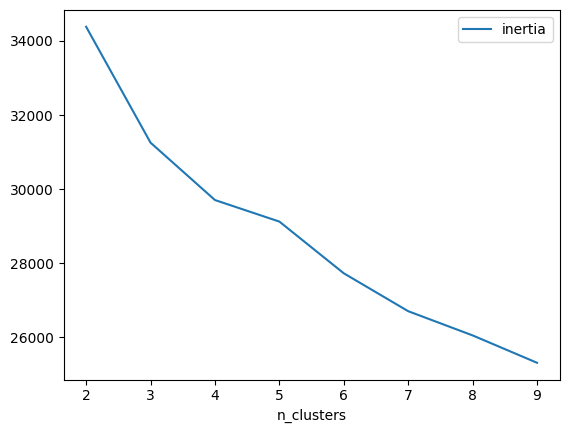

In [18]:
ls = []
for c in np.arange(2, 10):
    km = KMeans(n_clusters=c, n_init='auto')
    km.fit_predict(train)
    ls.append({'n_clusters': c, 'inertia': km.inertia_})
scores = pd.DataFrame(ls)
scores = scores.sort_values('inertia')
scores.set_index('n_clusters', inplace=True)
scores.plot();

In [19]:
km = KMeans(n_clusters=3, n_init='auto')
train['cluster'] = km.fit_predict(train)
train

,Country=China,Country=India,Country=Other,Country=Pakistan,Country=Philipines,Country=UAE,Emirate=Abu Dhabi,Emirate=Dubai,Emirate=Sharjah,Education=Bachelor,...,Gender=F,Gender=M,Marital Status=Divorced,Marital Status=Married,Marital Status=Single,Coverage=Basic,Coverage=Extended,Coverage=Premium,Income,cluster
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,1,0,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0.562847,0
QZ44356,0,0,0,0,1,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0.000000,1
AI49188,0,0,0,0,0,1,0,1,0,1,...,1,0,0,1,0,0,0,1,0.487763,2
WW63253,0,1,0,0,0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0.000000,1
HB64268,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,1,0,0,0.438443,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0,1,0,0,0,0,0,0,1,1,...,0,1,0,1,0,1,0,0,0.719547,0
PK87824,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0.216081,2
TD14365,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0.000000,1


In [20]:
df['cluster'] = train['cluster']
df.reset_index(inplace=True)
del df['Customer']
df

,Country,Emirate,Education,Occupation,Gender,Marital Status,Coverage,Income,cluster
0,Other,Dubai,Bachelor,Employed,F,Married,Basic,56274,0
1,Philipines,Dubai,Bachelor,Self-Employed,F,Single,Extended,0,1
2,UAE,Dubai,Bachelor,Employed,F,Married,Premium,48767,2
3,India,Dubai,Bachelor,Self-Employed,M,Married,Basic,0,1
4,Other,Abu Dhabi,Bachelor,Employed,M,Single,Basic,43836,0
...,...,...,...,...,...,...,...,...,...
9129,India,Sharjah,Bachelor,Employed,M,Married,Basic,71941,0
9130,India,Dubai,College,Employed,F,Divorced,Extended,21604,2
9131,India,Dubai,Bachelor,Self-Employed,M,Single,Extended,0,1
9132,India,Dubai,College,Employed,M,Married,Extended,21941,0


In [23]:
nice_cols = ['Country', 'Emirate', 'Education', 'Occupation', 'Gender',
             'Marital Status', 'Coverage', 'Income', 'cluster']

In [24]:
for c in df.cluster.unique():
    temp = get_cluster_representation(df[nice_cols], 'cluster', c, 5, 5)
    temp.to_csv(f'data/cluster_{c}', index=False)

100%|██████████| 383/383 [00:00<00:00, 8201.62it/s]


Combination 5 by 5


2963it [00:25, 118.17it/s]